<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 18

### Martin van der Schelling | <a href = "mailto: m.p.vanderschelling@tudelft.nl">m.p.vanderschelling@tudelft.nl</a>  | Doctoral Candidate

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
```
git reset --hard origin/main
```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

# To limit the number of rows to show in a dataframe, for presentation purposes:
import pandas as pd

pd.set_option('display.max_rows', 10)

## Outline for today

* Using `f3dasm` and its in-built Design of Experiments functionalities.

* Simple model selection.

**Reading material**: This notebook + `f3dasm` documentation page ([link](https://f3dasm.readthedocs.io/en/latest/))

### Installing `f3dasm`

You can install `f3dasm` with pip:

_Make sure you install the correct version (1.5.4)_

You can check this by running:

```
python -m pip list
```

In [2]:
try:
    import f3dasm
except ModuleNotFoundError: # If f3dasm is not found in current environment, install the correct version from pip
    %pip install f3dasm==1.5.4 --quiet
    import f3dasm
    
seed = 1987 # set a random seed so that everyone gets the same result
np.random.seed(seed)

In [3]:
from f3dasm import ExperimentData
from f3dasm.design import Domain

# Let's define the Design of Experiments
car_domain = Domain() # create a domain for the car stopping distance problem

# Add car velocity "x" as a continuous input variable and define its bounds:
car_domain.add_float(name='x', low=3.0, high=83.0)

# Use "Random Uniform sampling" as a sampling method to create 33 input samples "Data_x":
car_experimentdata = ExperimentData.from_sampling(domain=car_domain, n_samples=33, sampler='random', seed=seed)

**NOTE**: You are welcome to ask f3dasm to print each object that you created (`car_domain` and `car_experimentdata`)

In [4]:
print(car_domain)

Domain(space={'x': _ContinuousParameter(lower_bound=3.0, upper_bound=83.0, log=False)}, output_space={})


In [5]:
print(car_experimentdata)

    jobs      input
                  x
0   open  24.390474
1   open  54.585437
2   open  29.602423
3   open   43.87678
4   open   76.22399
..   ...        ...
28  open     6.2019
29  open    5.53494
30  open  21.001738
31  open  12.930826
32  open  31.659769

[33 rows x 2 columns]


Let's visualize the 33 input points that we created using "Random Uniform sampling".

In [6]:
# f3dasm can quickly give you the inputs and outputs directly from your ExperimentData object:
Data_x, _ = car_experimentdata.to_pandas()

**NOTE**: Instead of writing

```
Data_x, _ = car_experimentdata.to_pandas()
```
We could have written:

```
Data_x, Data_y = car_experimentdata.to_pandas()
```

but `Data_y` is an empty object because we have not yet generated any data! So far, we are only defining the **Design of Experiments**

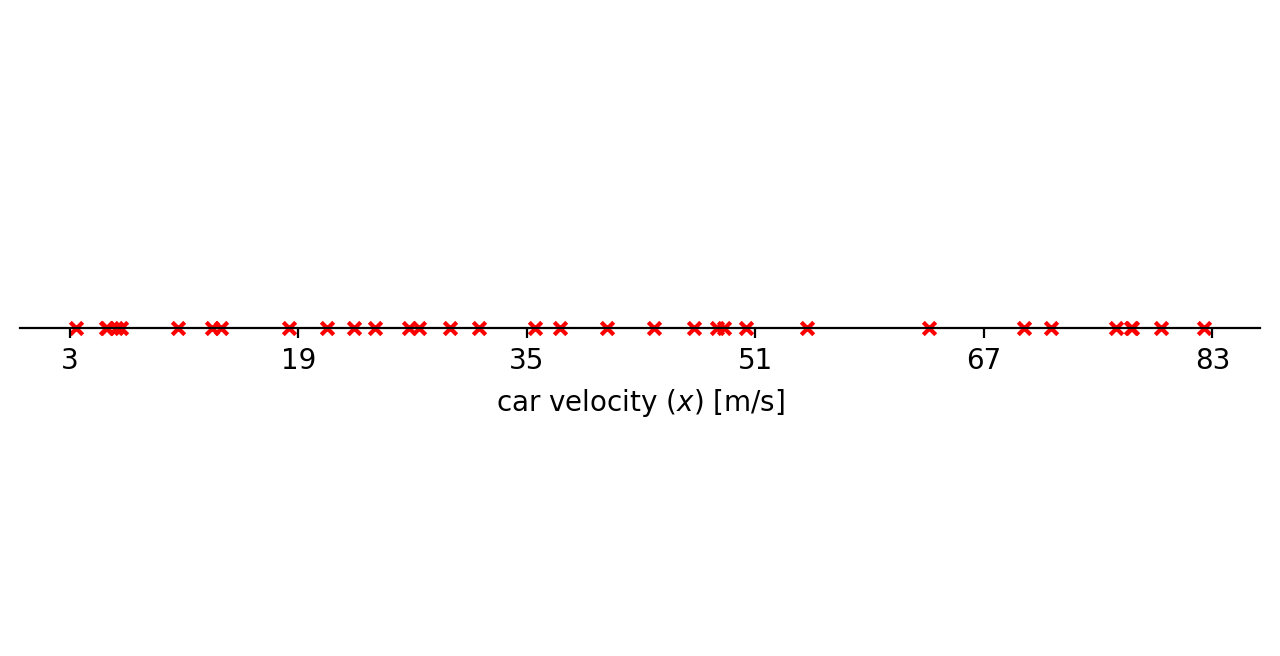

In [7]:
fig, ax = plt.subplots()
ax.spines[['top', 'right','left']].set_visible(False) # don't show the top, right and left box edges
ax.spines['bottom'].set_position('zero') # set box edge as x-axis
ax.get_yaxis().set_visible(False) # don't show the y-axis because there's no output data yet
ax.set_xlabel('car velocity ($x$) [m/s]') # label the x-axis
ax.set_xticks(np.linspace(3.0, 83.0, 6)) # create 6 tick marks in the x-axis
ax.scatter(Data_x, np.zeros(len(Data_x)), s=20, c='red', marker='x' ) # create markers for each sample
plt.show()

- What's the difference between these samples and the ones we created last lecture (Lecture 17)?

## In-class Exercise 1

`f3dasm` has some in-built sampling methods: see [built-in functionalities documentation](https://f3dasm.readthedocs.io/en/latest/rst_doc_files/defaults.html#implemented-samplers)

Redo the above Design of Experiments for the car stopping distance problem but now considering $N=15$ input samples and using a different sampling method:

1. Latin Hypercube Sampling

2. Sobol Sequence sampling

In the homeworks you will explain what are the differences between these sampling methods...

In [8]:
# Write your code for Exercise 1:

# until here.

## Putting it all together (one more time!)

Now that we learned how to use sampling methods in `f3dasm` to do Design of Experiments, let's redo the car stopping distance problem from start to finish in a single code block.

This will help us understand the data-driven process from start to finish to solve problems:

First, we need to decide what is our goal.

- Our goal is to discover a model for the relationship between the car velocity and the car stopping distance by observing 20 drivers stopping a car.

What type of problem are we trying to solve?

* A **regression problem** between the input $x$ (velocity) and the output $y$ (stopping distance).

Recall Lecture 17: For this data-driven problem, which of the 4 modules (_Design of Experiments_, _Data Generation_, _Machine Learning_, and _Optimization_) are needed and in what order?

* We need 3 modules:

    1. Design of Experiment: create input samples according to a sampling method of choice
    2. Data Generation: collect observations (generate output samples)
    3. Machine Learning: train a regression model on the observed samples

<center><img src="../figures/f3dasm_carstoppingdistance_line.svg" title="f3dasm Car stopping distance" width="70%"></center>

<img src="../figures/f3dasm_carstopping_design.svg" title="f3dasm Car stopping distance design" width="22%" align="right">

1. Design of Experiments module:

- We want to create an experiment. This time we will ask $N=20$ people to drive a car with a minimum velocity between 3 m/s and maximum velocity of 83 m/s.

    - Let's choose **Latin Hypercube Sampling**.

- Then, we conduct the experiment, so that we can generate data (measure the stopping distance of each driver).

2. Data generation:

- One way to generate data is to conduct a **real** experiment. In this case, you go to a test road, ask all drivers to drive at velocities that you sampled in the Design of Experiments module.

- Alteratively, a **synthetic** data generation process is common in Engineering. In this course, we have been mimicking this by using a "ground truth" **analytical model** of the car stopping distance:

$${\color{red}y} = {\color{blue}z} x + 0.1 {\color{green}x}^2 \quad\quad \text{where } z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$$

<img src="../figures/f3dasm_carstopping_datageneration.svg" title="f3dasm Car stopping distance datageneration" width="22%" align="right">

**NOTE**: Synthetic data generation can also result from **simulations**, such as the *Finite Element* and *Finite Difference* methods (e.g. structures and fluids), *Molecular Dynamics* and *Density Functional Theory* (e.g. materials).

Therefore, the Data Generator is **usually more complicated** than a simple analytical function that computes the distance of a car... However, you need specialized training to master these (and other) types of simulations. So, this course only deals with two scenarios: (1) *analytical functions* (to mimick the data generation process); or (2) *already existing experimental/synthetic data* (mimicking the case where someone already *Designed the Experiment* and *Generated the Data*).



3. Machine learning:

- Once we collect the data, finding the relationship between $x$ and $y$ implies the training of a regression model on that data.

    * This time, let's use a **Gaussian Process** model with the Constant $\times$ RBF kernel to predict the car stopping distance from our Data (`Data_x` and `Data_y`). We will split our data into 75% training data and the rest for testing.

In [9]:
#___________________________________________________________________________
# 1. Design of Experiment (redoing the same as beginning of lecture):

car_domain = Domain() # create a domain for the car stopping distance problem
car_domain.add_float(name='x', low=3.0, high=83.0)
car_experimentdata = ExperimentData.from_sampling(domain=car_domain, n_samples=20,
                                                  sampler='latin', seed=seed)
Data_x, _ = car_experimentdata.to_pandas() # Save input data as dataframe:

In [10]:
#___________________________________________________________________________
# 2. Data Generator module:

from scipy.stats import norm # import the normal dist, as we learned before!
# Define our car stopping distance function
def compute_distance(x):
    z = norm.rvs(1.5, 0.5, size=1) # randomly draw 1 sample from the normal dist.
    y = z*x + 0.1*x**2 # compute the stopping distance
    return y
#
# Run Data Generator function for all input data points:
car_experimentdata.evaluate(data_generator=compute_distance, output_names=['y'])

In [11]:
#___________________________________________________________________________
# 3. Train the Gaussian Process Regression model (like Lectures 14 and 15)

from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

# Get our Data_x and Data_y as numpy arrays and save as X_data and y_data:
X_data, y_data = car_experimentdata.to_numpy() # use numpy arrays, instead of pandas dataframes

# Split the dataset into training (75%) and testing (25%):
testset_ratio = 0.25 # ratio of test set points from the dataset

X_train, X_test, y_train, y_test = train_test_split(X_data,
                                    y_data, test_size=testset_ratio,
                                    random_state=seed)

In [12]:
# Scale the input and output data:
from sklearn.preprocessing import StandardScaler
# Scale inputs:
scaler_x = StandardScaler() # Scaling inputs with a Standard Scaler:
scaler_x.fit(X_train) # fit the scaler to the input data
X_train_scaled=scaler_x.transform(X_train) # scale the input training data
X_test_scaled=scaler_x.transform(X_test)  # scale the input testing data
#
# Scale outputs:
scaler_y = StandardScaler()
scaler_y.fit(y_train) # fit the scaler to the output data
y_train_scaled=scaler_y.transform(y_train) # scale the output training data
y_test_scaled=scaler_y.transform(y_test)  # scale the output testing data
#

In [13]:
# Define kernel:
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(
    length_scale=1e-1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-10, 1e1) )
# Create GPR model with negligible alpha:
gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-3, n_restarts_optimizer=20) # using a small alpha

# Train model on SCALED inputs and outputs
gp_model.fit(X_train_scaled, y_train_scaled)

# Predict for test set (for error metric)
y_test_pred_scaled, sigma_test_pred_scaled = gp_model.predict(X_test_scaled, return_std=True)
# Scale mean and std back, as above.
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1))
sigma_test_pred = scaler_y.inverse_transform(sigma_test_pred_scaled.reshape(-1, 1)) - np.mean(y_train)

In [14]:
# -------- code below is for plotting purposes:
# Create 100 points for plotting the model:
n_plot = 100 # number of points used for plotting the model
low = car_domain.get_bounds()[0,0] # get lower bound of the first (and only) input variable of our domain
high = car_domain.get_bounds()[0,1] # get upper bound of the first (and only) input variable of our domain
x_plot = np.linspace(low, high, n_plot) # create equally spaced points for plotting (within the bounds of our x)
X_plot = np.reshape(x_plot,(-1,1)) # a 2D array that scikit-learn likes
X_plot_scaled=scaler_x.transform(X_plot) # scale the input data (the whole dataset)
# Make the prediction on the data points for plotting, both for mean and standard deviation
y_plot_pred_scaled, sigma_plot_pred_scaled = gp_model.predict(X_plot_scaled, return_std=True)
# Remember to scale the predictions for the mean of the output back to the original scale!
y_plot_pred = scaler_y.inverse_transform(y_plot_pred_scaled.reshape(-1, 1)) # mean
# Remember to do the same for the std (but don't forget that we need to remove the mean: See Lecture 15)
sigma_plot_pred = scaler_y.inverse_transform(sigma_plot_pred_scaled.reshape(-1, 1)) - np.mean(y_train)

# Now plot the model, including the training and test points
fig1, ax1 = plt.subplots() # This opens a new figure
ax1.plot(X_train, y_train, 'ro', markersize=6, label="training points") # show training points
ax1.plot(X_test, y_test, 'kX', markersize=6, label="testing points") # show testing points
# Plot GPR model prediction, including 95% confidence interval:
ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot_pred,
                        (y_plot_pred + 1.9600 * sigma_plot_pred)[::-1]]),
         alpha=.2, fc='b', ec='None', label='95% confidence interval')
ax1.set_xlabel('$x$ (m/s)', fontsize=20)
ax1.set_ylabel('$y$ (m)', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close figure to open it in next cell.

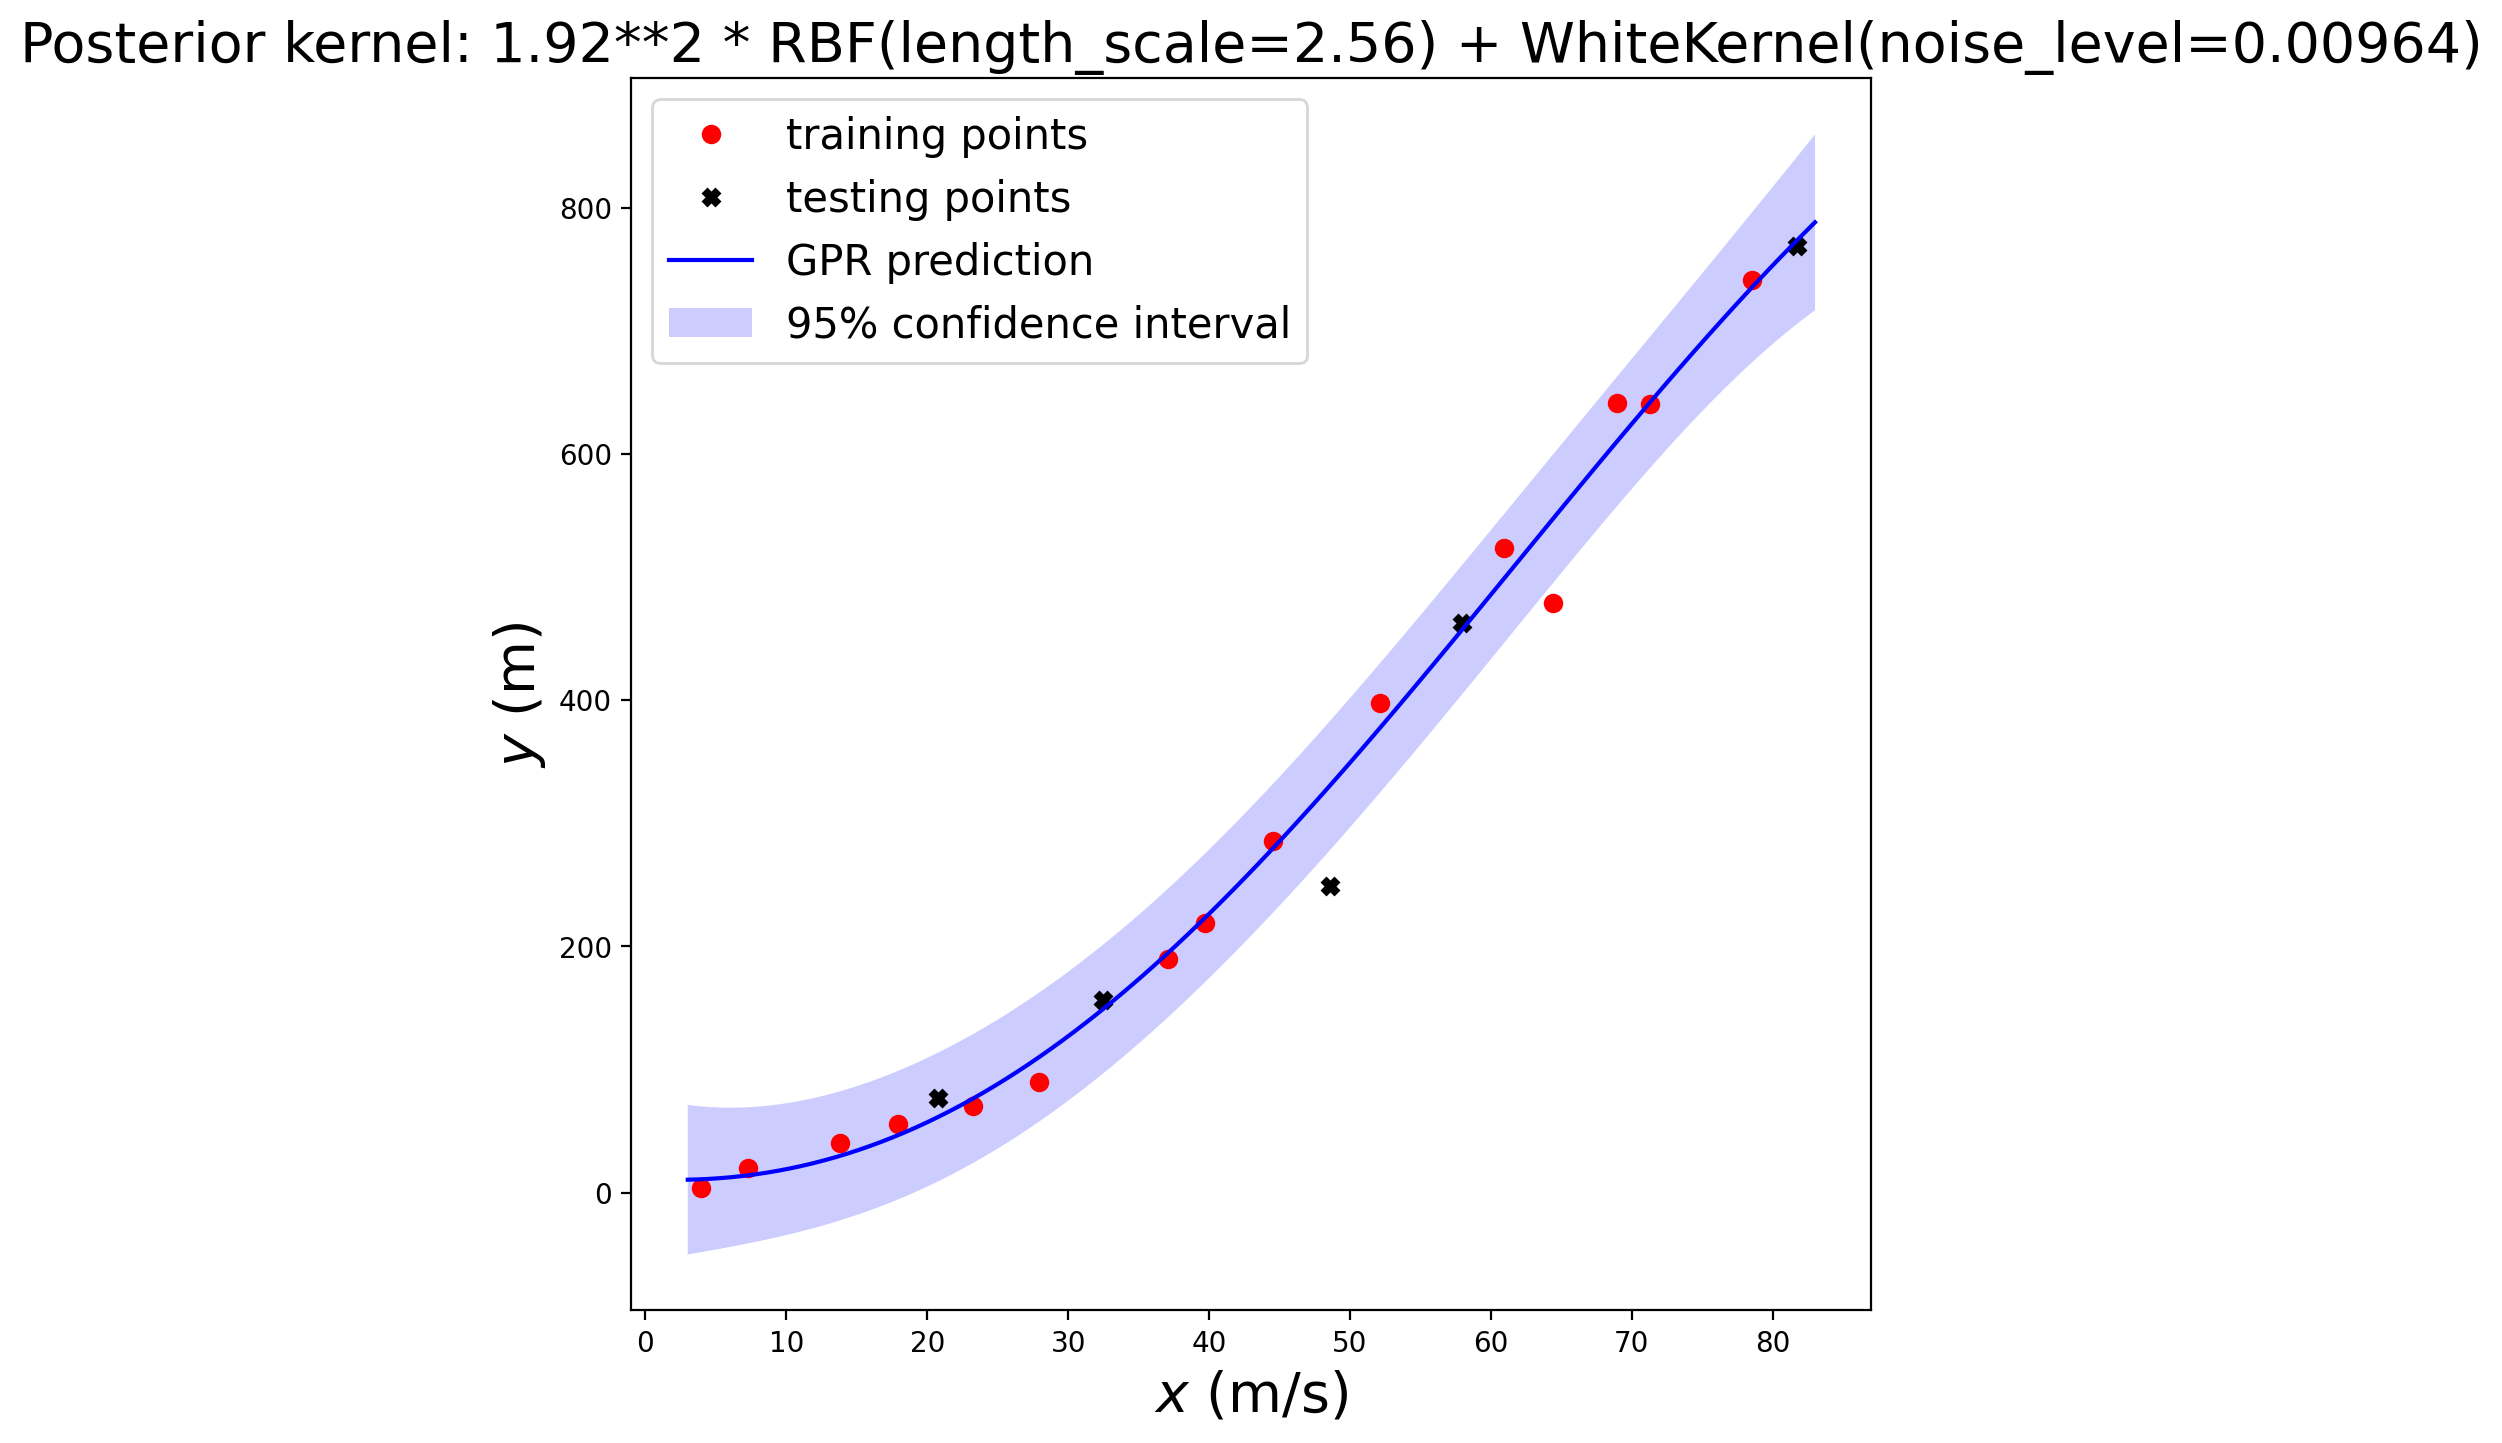

In [15]:
# Show figure with our Gaussian Process Regression model resulting from the data-driven process
fig1

In [16]:
# This cell is hidden during presentation. It's used to create the ground truth plot
def car_fig(ax):
    x = np.linspace(3, 83, 1000)
    mu_z = 1.5; sigma_z = 0.5;  # parameters of the "true" p(z)
    mu_y = mu_z*x + 0.1*x**2 # From Homework of Lecture 4
    sigma_y = np.sqrt( (x*sigma_z)**2 ) # From Homework of Lecture 4
    ax.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
    ax.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
    ax.set_title("Car stopping distance problem", fontsize=20); # create title with font size 20
    ax.plot(x, mu_y, 'k:', label="Governing model $\mu_y$")
    ax.fill_between(x, mu_y - 1.9600 * sigma_y,
                    mu_y + 1.9600 * sigma_y,
                    color='k', alpha=0.2,
                    label='95% confidence interval ($\mu_y \pm 1.96\sigma_y$)') # plot 95% credence interval
    ax.legend(fontsize=15)

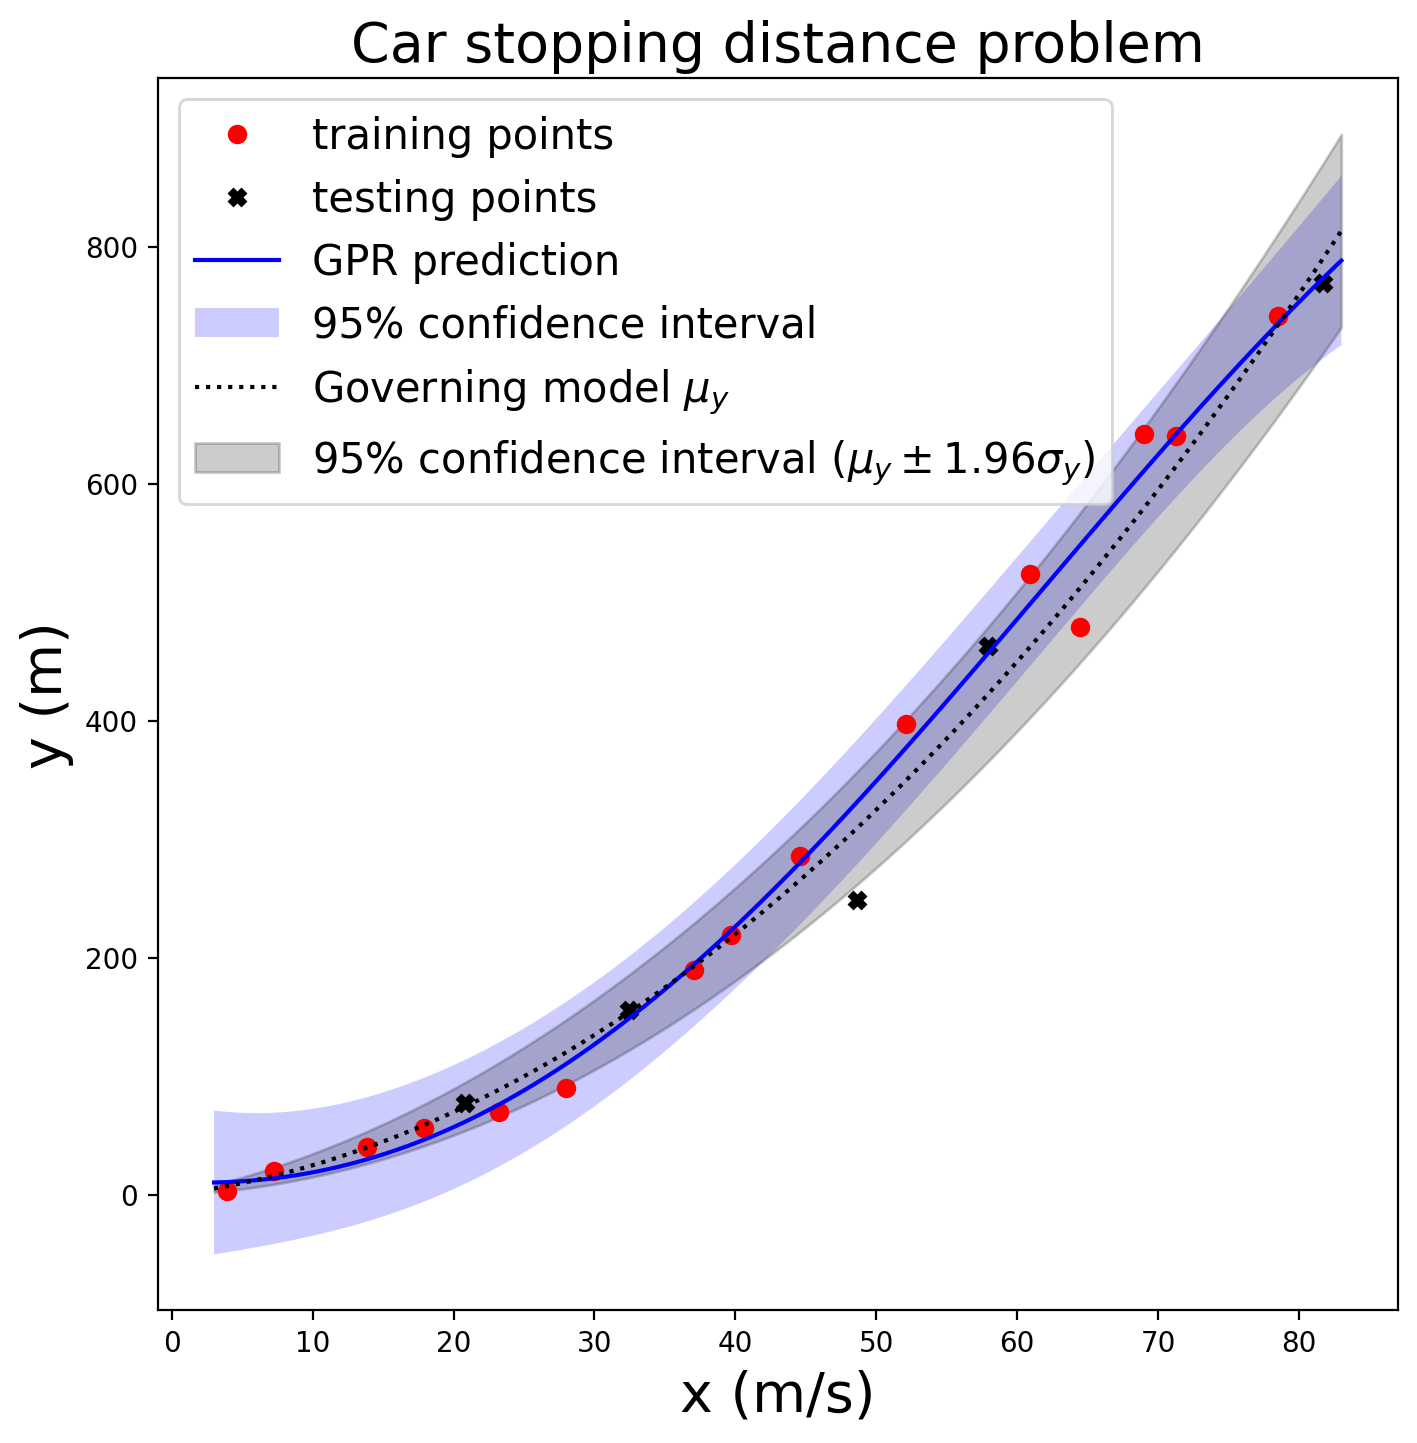

In [17]:
# Show both the ground truth (grey) and the GPR model prediction (blue)
car_fig(ax1) # create ground truth figure of car stopping distance
fig1

This is a decent model.

However, we cannot determine the heteroscedasticity of noise because the WhiteKernel assumes homoscedasticity (we only have one hyperparameter associated to noise, which is found by Type-II MLE together with the two other parameters of our composite kernel).

* Dealing with heteroscedastic aleatoric uncertainty (heteroscedastic noise), especially if it is non-Gaussian, can be a tricky problem. Fortunately, the mean prediction can be quite forgiving (even if we have the wrong model for the aleatoric uncertainty)

## Model selection (made simple)

There are many other ways to follow the data-driven process.

For example, what if our goal is to compare and select different models or different hyperparameters for a given model?

### Example: Finding polynomial degree for linear regression model with polynomial features

Let's use `f3dasm` to train a Linear Regression model with polynomials of various degrees. While you've done a similar exercise before, you'll find that `f3dasm` simplifies the workflow.

Before we start, let's think about what is our goal?

- Our goal is not just to train one model on a particular dataset. Now we want to train multiple linear regression models with different polynomial degrees.

    * Let's say that we want to compare 5 linear regression models with polynomial features of degree 1, 3, 5, 7 and 11 (like you did in a previous homework!).
    * In order for us to do that we need to evaluate the performance of each model for a particular problem. Let's pick the function $y = x \sin{x}$ on a dataset of 50 points with $x \in (0, 10)$. We will use two regression metrics to assess the performance of each model: $R^2$ and MSE scores.

Which of the 4 modules of the data-driven process we need?

* Now we just need 2 modules: 1) Design of Experiments, and 2) Data Generation.

But...

* What is our Design of Experiment?

* What is our Data generation?

1. Design of Experiments

In this case, we have 5 samples and we have **already defined them manually**: each sample is a linear regression model with polynomial features of a chosen degree!

* Therefore, we will not need to use a Sampling Method. Each sample is simply the degree of the polynomial: 1, 3, 5, 7 and 11.

2. Data generation

In this case, our goal is to **evaluate the performance** of each model. So, our output data is the $R^2$ score as well as the MSE score for each chosen model.

Since we do not care about the actual regression models themselves, as we simply want to compare them, our data generation module needs to accept the polynomial degree as input, and then output the $R^2$ and MSE scores for that model.

**Note**: You can also think about this Data Generation module as resulting from a another data-driven process where a given model is trained and tested on the dataset with 50 points. This "inner" data-driven process includes generating 50 samples for $x$, evaluating them for $y = x \sin{x}$, and training/testing the linear regression model on that dataset (thus, the "inner" data-driven process would have 3 modules: *Design of Experiments*, *Data generation*, *Machine Learning*).

* For simplicity, today, we will not define a nested data-driven process. Instead, we will just define the Data Generator module by doing everything inside it without calling `f3dasm` *again*.

In [18]:
def f(x):
    return x * np.sin(x)

Data_x = np.linspace(0., 10., 50) # Create 50 sampling points within the bounds of 0 and 10
Data_y = f(Data_x) # Evaluating Data_x on the function f(x)=x*sin(x)

We use the `test_train_split` function from `scikit-learn` to split the data:

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_x.reshape(-1, 1), Data_y, random_state=123)

Normally what we would do, is creating the `LinearRegression` model with `PolynomialFeatures`, fitting the model on `X_train` and `y_train` and predicting on the testing data `X_test`:

In [20]:
from sklearn.preprocessing import PolynomialFeatures # For Polynomial fit
from sklearn.linear_model import LinearRegression # For Least Squares
from sklearn.pipeline import make_pipeline # to link different objects

# Linear regression model with polynomial features of degree 2
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()) 

# Fit the training data
model.fit(X_train, y_train)

# Predicting on the testing data
y_pred = model.predict(X_test)

We can evaluate how good the predictions are by evaluating some performance metrics:

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 score: {r2:.2f}")
print(f"MSE: {mse:.2f}")


R^2 score: -0.20
MSE: 9.04


### Vary the degree of the polynomial

In order to investigate the influence of the degree of the polynomial features, we are going to create a function that accepts the degree as an input, trains the model and returns the performance metrics that we are interested in:

In [22]:
#___________________________________________________________________________
# 1. Design of Experiment (this time it is a manual process):
domain_degree = Domain()
domain_degree.add_int(name='poly_degree', low=0, high=20) # the lower and upper bounds do not matter
# Design the Experiment for degrees 1, 3, 5, 7 and 11:
LR_experiment_data = ExperimentData(input_data=np.array([1, 3, 5, 7, 11]), domain=domain_degree)

In [23]:
# Show the LR_experiment_data:
LR_experiment_data

,jobs,input
,,poly_degree
0,open,1
1,open,3
2,open,5
3,open,7
4,open,11


In [24]:
#___________________________________________________________________________
# 2. Data generation (model performance for given degree):
from sklearn.preprocessing import PolynomialFeatures # For Polynomial fit
from sklearn.linear_model import LinearRegression # For Least Squares
from sklearn.pipeline import make_pipeline # to link different objects

def evaluate_LR_model_for_degree(poly_degree: int): # input to Data Generator is poly_degree
    # Define our "ground truth" function to evaluate the model:
    def f(x):
        return x * np.sin(x)
    #
    # Create the dataset (which is the same for every model)
    Data_x = np.linspace(0., 10., 50) # Create 50 sampling points within the bounds of 0 and 10
    Data_y = f(Data_x) # Evaluating Data_x on the function f(x)=x*sin(x)
    # Split into training/testing:
    X_train, X_test, y_train, y_test = train_test_split(Data_x.reshape(-1, 1), Data_y, random_state=seed)
    # NOTE: for conciseness, I am not scaling the data (inputs/outputs are small and close to zero here)
    #
    # Linear regression model with polynomial features and degree=degree:
    model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression()) 
    # Fit the training data
    model.fit(X_train, y_train)
    # Predicting on the testing data
    y_pred = model.predict(X_test)
    # Calculate the performance metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    #
    return r2, mse # output of Data Generator is R2 and MSE scores for this LR model of given degree

**Note 1**: It would be better practice to define the `f` function and the dataset (`Data_x` and `Data_y`) *outside* the `evaluate_LR_model_for_degree` function, as it only needs to be evaluated once. But today I want to reinforce the mental picture of "a single module" for the Data Generator that can be defined using only one function (`evaluate_LR_model_for_degree`). Python is an object oriented language, and it is very flexible. The next lecture will clarify a more general way of defining each of the data-driven modules.

**Note 2**: You can call the `evaluate_LR_model_for_degree` function to check that it outputs the $R^2$ value and MSE for a particular degree (for example, degree 4):

In [25]:
evaluate_LR_model_for_degree(4)

(0.9427984523624333, 0.9463259634072969)

In [26]:
# Run Data Generator function for all input data points:
LR_experiment_data.evaluate(evaluate_LR_model_for_degree, output_names=['r2', 'mse'])

Now let's see the outcome of our data-driven process:

In [27]:
LR_experiment_data

jobs       input    output           
            poly_degree        r2        mse
0  finished           1   0.06596  15.452484
1  finished           3  0.355083  10.669314
2  finished           5  0.922255   1.286183
3  finished           7  0.996961   0.050281
4  finished          11       1.0   0.000002

That's it! You only need the code in Cells 22 and 24 to assess different models.

In this case, the best model is for a polynomial basis function of degree 11.

* This is a simple way to do model selection. You will explore this more in Homework 7

### See you next class

Have fun!

### Solution for Exercise 1

```python
car_ex1_domain = Domain() # create domain and call it car_domain_ex1
car_ex1_domain.add_float(name='x', low=3.0, high=83.0) # add x variable to domain

# Create ExperimentData object with n_samples=15 and samples='latin' or 'sobol' as the sampling method:
car_ex1_experimentdata = ExperimentData.from_sampling(domain=car_ex1_domain, n_samples=15,
                                                      sampler='latin', seed=seed)

Data_ex1_x, _ = car_ex1_experimentdata.to_pandas() # get the Data_x dataframe

fig, ax = plt.subplots()
ax.spines[['top', 'right','left']].set_visible(False) # don't show the top, right and left box edges
ax.spines['bottom'].set_position('zero') # set box edge as x-axis
ax.get_yaxis().set_visible(False) # don't show the y-axis because there's no output data yet
ax.set_xlabel('car velocity ($x$) [m/s]') # label the x-axis
ax.set_xticks(np.linspace(car_domain.get_bounds()[0,0], # lower bound of x
                          car_domain.get_bounds()[0,1], 6)) # upper bound of x, and 6 tick marks in x-axis
ax.scatter(Data_ex1_x, np.zeros(len(Data_ex1_x)), s=20, c='red', marker='x') # create markers for each sample
plt.show()
```